# IRENE-PMAPS

## Test IRENE PMAPS

In [1]:
import time
%matplotlib inline
%load_ext autoreload
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np
import Core.mplFunctions as mpl
import Core.wfmFunctions as wfm
from Database import loadDB
import ICython.Sierpe.BLR as blr
import ICython.Core.peakFunctions as cpf
import Core.peakFunctions as pf
from ICython.Core.system_of_units import SystemOfUnits 
from scipy import signal
%load_ext Cython

In [2]:
print(time.strftime("%d/%m/%Y"))
print(time.strftime("%H:%M:%S"))

14/12/2016
11:54:39


In [3]:
from time import time

### Read PMAPS file

In [4]:
path='/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC/run3112/'

In [5]:
fpmaps400 = tb.open_file(path+'pmaps_3112_0_400.h5')

### Read S1, S2 and S2Si into data frames

In [6]:
t0 = time()
s1t = fpmaps400.root.PMAPS.S1
S1df = pd.DataFrame.from_records(s1t.read())
t1 = time()        
dt = t1 - t0

print("read S1 in {} s".format(dt))

read S1 in 0.360090970993 s


In [114]:
S1df

,event,peak,time,ene
0,0,0,271650.0,7.578062
1,0,0,271675.0,26.388638
2,0,0,271700.0,53.285999
3,0,0,271725.0,75.272369
4,0,0,271750.0,81.818665
5,0,0,271775.0,71.910141
6,0,0,271800.0,52.719391
7,0,0,271825.0,33.513714
8,0,0,271850.0,18.906300
9,0,0,271875.0,10.179748


In [116]:
S1df.index

RangeIndex(start=0, stop=2374360, step=1)

In [7]:
t0 = time()
s2t = fpmaps400.root.PMAPS.S2
S2df = pd.DataFrame.from_records(s2t.read())
t1 = time()        
dt = t1 - t0

print("read S2 in {} s".format(dt))

read S2 in 0.415359973907 s


In [8]:
t0 = time()
s2sit = fpmaps400.root.PMAPS.S2Si
S2Sidf = pd.DataFrame.from_records(s2sit.read())
t1 = time()        
dt = t1 - t0

print("read S2Si in {} s".format(dt))

read S2Si in 3.14368700981 s


### Plot distributions

In [9]:
S2Sidf.head()

,event,peak,nsipm,nsample,ene
0,0,0,1472,25,5.278246
1,0,0,1472,28,5.877978
2,0,0,1472,29,11.635410
3,0,0,1472,30,12.295116
4,0,0,1472,31,16.673164


(array([ 3974100.,  6837993.,  7909176.,  5943539.,  3072344.,  1511734.,
          860494.,   494856.,   216410.,    91667.]),
 array([  0. ,   4.9,   9.8,  14.7,  19.6,  24.5,  29.4,  34.3,  39.2,
         44.1,  49. ]),
 <a list of 10 Patch objects>)

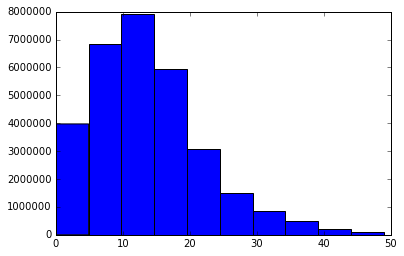

In [12]:
plt.hist(S2Sidf.nsample[S2Sidf.nsample<50])

(array([  3247997.,  11236536.,   6040090.,   3457026.,   2145995.,
          1402584.,    957443.,    670149.,    479337.,    348648.]),
 array([  1.56774068,   6.41096165,  11.25418262,  16.0974036 ,
         20.94062457,  25.78384554,  30.62706652,  35.47028749,
         40.31350846,  45.15672944,  49.99995041]),
 <a list of 10 Patch objects>)

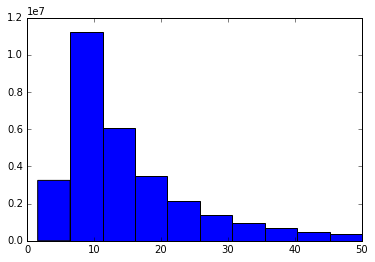

In [14]:
plt.hist(S2Sidf.ene[S2Sidf.ene<50])

In [15]:
S1df.head()

,event,peak,time,ene
0,0,0,271650.0,7.578062
1,0,0,271675.0,26.388638
2,0,0,271700.0,53.285999
3,0,0,271725.0,75.272369
4,0,0,271750.0,81.818665


(array([ 923227.,  485748.,  302305.,  209638.,  146586.,   99640.,
          66998.,   44452.,   30195.,   20088.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

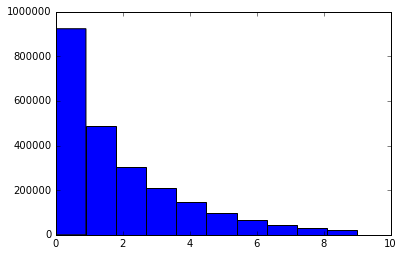

In [17]:
plt.hist(S1df.peak[S1df.peak<10])

(array([ 470.,  469.,  502.,  311.,  149.,  468.,  404.,  349.,  356.,  616.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

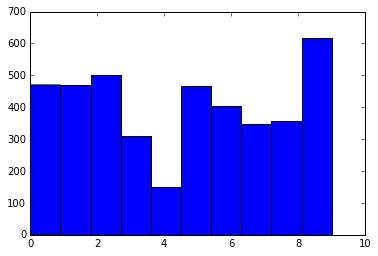

In [20]:
plt.hist(S2Sidf.event[S2Sidf.event<10])

In [30]:
t0 = time()
s12t = S1df.loc[lambda df: S1df.event.values ==0, :]
t1 = time()        
dt = t1 - t0

print("run in {} s".format(dt))

run in 0.00359892845154 s


In [110]:
t0 = time()
mask = S1df.event.values ==0 
s12t = S1df[mask]
t1 = time()        
dt = t1 - t0

print("run in {} s".format(dt))

run in 0.0032639503479 s


In [132]:
print(S1df[0:100])

    event  peak      time        ene
0       0     0  271650.0   7.578062
1       0     0  271675.0  26.388638
2       0     0  271700.0  53.285999
3       0     0  271725.0  75.272369
4       0     0  271750.0  81.818665
5       0     0  271775.0  71.910141
6       0     0  271800.0  52.719391
7       0     0  271825.0  33.513714
8       0     0  271850.0  18.906300
9       0     0  271875.0  10.179748
10      0     0  271900.0   4.809398
11      0     0  271925.0   2.121005
12      0     0  271950.0   2.009522
13      0     0  271975.0   1.648805
14      0     0  272000.0   1.265607
15      0     1  570300.0   2.364435
16      0     1  570325.0   6.257989
17      0     1  570350.0   7.871673
18      0     1  570375.0   4.097559
19      0     1  570400.0   6.645101
20      0     1  570425.0   6.467822
21      0     1  570450.0   5.710946
22      0     1  570550.0   3.741935
23      0     1  570575.0   3.941160
24      0     1  570600.0   1.258925
25      1     0  518400.0   2.431399
2

In [201]:
def df_to_dict(df, evt_max=10):
    """
    df to dict
    """
    evt = 0
    pk = 0

    S12L = {}
    S12 = {}
    S12[0] = [[],[]]
    S12L[0] = S12
    
    for i in df.index:
        if evt == evt_max:
            break
        if df.event[i] == evt:
            S12 = S12L[evt]
            if df.peak[i] == pk:
            #print('now in event = {}'.format(evt))
                s12l = S12[pk]
                s12l[0].append(df.time.values[i])
                s12l[1].append(df.ene.values[i])
                #if df.peak[i] == pk:
                #continue
                #print('now in peak = {}'.format(pk))
                #print(i,df.event[i],df.peak[i], df.time[i],df.ene[i])
            else:
                pk = df.peak[i]
                S12[pk] = [[df.time.values[i]],[df.ene.values[i]]]
                #print('-->new peak')
                #print(i,df.event[i],df.peak[i], df.time[i],df.ene[i])
        else:
            
            S12 = S12L[evt]
            for j in S12.keys():
                s12l = S12[j]
                t = np.array(s12l[0])
                e = np.array(s12l[1])
                S12[j] = [t,e]
            S12L[evt] = S12
            
            evt = df.event[i]
            if evt == evt_max:
                break
                
            pk = df.peak[i]
            S12 = {}
            S12[pk] = [[df.time.values[i]],[df.ene.values[i]]]
            S12L[evt] = S12
            
            #print('->new event')
            #print('->new peak')
            #print(i,df.event[i],df.peak[i], df.time[i],df.ene[i])
    
            
    return S12L
        

In [239]:
evt=100
t0 = time()
S12L = df_to_dict(S1df,evt_max=evt)
t1 = time()        
dt = t1 - t0

print("run {} evts in {} s, time/event = {}".format(evt, dt, dt/float(evt)))

run 100 evts in 0.257179021835 s, time/event = 0.00257179021835


In [220]:
S12L

{0: {0: [array([ 271650.,  271675.,  271700.,  271725.,  271750.,  271775.,
           271800.,  271825.,  271850.,  271875.,  271900.,  271925.,
           271950.,  271975.,  272000.], dtype=float32),
   array([  7.57806158,  26.38863754,  53.2859993 ,  75.27236938,
           81.81866455,  71.91014099,  52.71939087,  33.51371384,
           18.90629959,  10.17974758,   4.80939817,   2.12100458,
            2.00952244,   1.64880466,   1.26560688], dtype=float32)],
  1: [array([ 570300.,  570325.,  570350.,  570375.,  570400.,  570425.,
           570450.,  570550.,  570575.,  570600.], dtype=float32),
   array([ 2.36443472,  6.25798941,  7.87167263,  4.09755898,  6.64510107,
           6.46782207,  5.71094561,  3.74193549,  3.94115973,  1.25892484], dtype=float32)]},
 1: {0: [array([ 518400.,  518425.,  518450.,  518475.,  518500.,  518525.,
           518550.,  518575.,  518600.,  518625.,  518650.,  518675.,
           518700.,  518725.], dtype=float32),
   array([  2.43139935,  13

In [217]:
def test_S12L(S12L, S12df, event=0, peak=0):
    """
    test
    """
    # get event=0, peak=0
    S12 = S12L[event]
    t,e = S12[peak]
    
    t2,e2 = S12_get_wvfm(S12df, event, peak)
    assert(np.array_equal(t, t2))
    assert(np.array_equal(e, e2))
    print('test passed')

In [222]:
test_S12L(S12L, S1df, event=0, peak=0)

test passed


In [223]:
test_S12L(S12L, S1df, event=0, peak=1)

test passed


In [225]:
for i in range(9):
    test_S12L(S12L, S1df, event=i, peak=0)

test passed
test passed
test passed
test passed
test passed
test passed
test passed
test passed
test passed


In [269]:
def S12df_to_dict(s12df, evt_max=10):
    peak = s12df.peak.values.astype(np.int32)
    
    return cdf_to_dict(len(s12df.index), evt_max, s12df.event.values,
                       peak,
                       s12df.time.values,
                       s12df.ene.values)
    
                  

In [270]:
evt=100
t0 = time()
S12L = S12df_to_dict(S1df,evt_max=evt)
t1 = time()        
dt = t1 - t0

print("run {} evts in {} s, time/event = {}".format(evt, dt, dt/float(evt)))

run 100 evts in 0.007159948349 s, time/event = 7.159948349e-05


In [267]:
def test_S12df_to_dict(s12df, evt_max=1, event=0, peak=0):
    """
    test
    """
    # get event=0, peak=0
    S12L = S12df_to_dict(s12df,evt_max=evt_max)
    S12 = S12L[event]
    t,e = S12[peak]
    
    S12L = df_to_dict(s12df, evt_max=10)
    S12 = S12L[event]
    t2,e2 = S12[peak]
    
    
    assert(np.array_equal(t, t2))
    assert(np.array_equal(e, e2))
    print('test passed')

In [268]:
test_S12df_to_dict(S1df, evt_max=1, event=0, peak=0)

(<type 'int'>, <type 'int'>)
(dtype('int32'), dtype('int32'), dtype('float32'), dtype('float32'))
test passed


In [271]:
evt=len(S1df.event.unique())
print('run over {} evts'.format(evt))
t0 = time()
S12L = S12df_to_dict(S1df,evt_max=evt)
t1 = time()        
dt = t1 - t0

print("run {} evts in {} s, time/event = {}".format(evt, dt, dt/float(evt)))

run over 70193 evts
run 70193 evts in 1.64547491074 s, time/event = 2.34421510797e-05


In [273]:
len(S12L.keys())

69414

In [260]:
%%cython
cimport numpy as np
import numpy as np

cpdef cdf_to_dict(int df_index, int evt_max, 
                  int [:] df_event, int [:] df_peak,
                  float [:] df_time, float [:] df_ene):
                
    """
    df to dict
    """
    cdef int evt = 0
    cdef int pk = 0

    cdef dict S12L = {}
    cdef dict S12 = {}
    S12[0] = [[],[]]
    S12L[0] = S12
    
    cdef int i, 
    for i in range(df_index):
        if evt == evt_max:
            break
        if df_event[i] == evt:
            S12 = S12L[evt]
            if df_peak[i] == pk:
            
                s12l = S12[pk]
                s12l[0].append(df_time[i])
                s12l[1].append(df_ene[i])
            else:
                pk = df_peak[i]
                S12[pk] = [[df_time[i]],[df_ene[i]]]
        else:
            
            S12 = S12L[evt]
            for j in S12.keys():
                s12l = S12[j]
                t = np.array(s12l[0])
                e = np.array(s12l[1])
                S12[j] = [t,e]
            S12L[evt] = S12
            
            evt = df_event[i]
            if evt == evt_max:
                break
                
            pk = df_peak[i]
            S12 = {}
            S12[pk] = [[df_time[i]],[df_ene[i]]]
            S12L[evt] = S12
            
    return S12L
    

In [60]:
def S12_select_event(S12df, event):
    return S12df.loc[lambda df: df.event.values ==event, :]       

In [89]:
S1df.peak.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

In [226]:
t0 = time()
s12t = S12_select_event(S1df, event=0)
t1 = time()        
dt = t1 - t0

print("run in {} s".format(dt))

run in 0.00415015220642 s


In [227]:
def S12_select_peak(S12df, peak):
    return S12df.loc[lambda df: S12df.peak.values ==peak, :]  

In [228]:
t0 = time()
s12p = S12_select_peak(s12t, peak=0)
t1 = time()        
dt = t1 - t0

print("run in {} s".format(dt))

run in 0.000876903533936 s


In [229]:
def S12_get_wvfm(S12df, event, peak):
    s12t = S12_select_event(S12df, event)
    s12p = S12_select_peak(s12t, peak=peak)
    return s12p.time.values, s12p.ene.values

In [230]:
t0 = time()
T, E = S12_get_wvfm(S1df, event=0, peak=0)
t1 = time()        
dt = t1 - t0

print("run in {} s".format(dt))

run in 0.00465607643127 s


In [231]:
def S12_get_wvfm_ene(S12df, event, peak):
    T, E = S12_get_wvfm(S1df, event=event, peak=peak)
    return np.sum(E)

In [233]:
t0 = time()
es1 = S12_get_wvfm_ene(S1df, event=0, peak=0)
t1 = time()        
dt = t1 - t0

print("run in {} s".format(dt))

run in 0.00440192222595 s


In [234]:
es1

443.42734

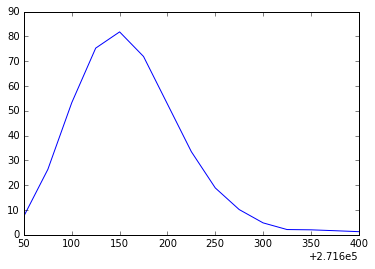

In [235]:
plt.plot(T,E)

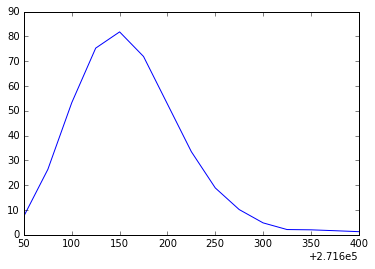

In [236]:
plt.plot(S12L[0][0][0],S12L[0][0][1])

In [100]:
def S12_get_ene_inc(sdf, event_list, peak=0):
    ene = np.zeros(len(event_list), dtype=np.double)
    T, E 
    i=0
    for event in event_list:
        mask = S1df.event.values == event 
        s12t = S1df[mask]
        T, E = S12_get_wvfm(sdf, event=event, peak=peak)
            ene[i] = np.sum(E)
            i+=1
    return ene
        

In [107]:
len(S1df.event.unique())

70193

In [109]:
t0 = time()
ene = S12_get_ene(S1df, event_list=range(100), peak_list=[0])
t1 = time()        
dt = t1 - t0

print("run in {} s".format(dt))

run in 0.330062150955 s


In [51]:
es1

443.42734

In [35]:
s12t

,event,peak,time,ene
25,1,0,518400.0,2.431399
26,1,0,518425.0,13.050335
27,1,0,518450.0,31.459312
28,1,0,518475.0,47.769619
29,1,0,518500.0,54.464569
30,1,0,518525.0,49.527153
31,1,0,518550.0,37.306366
32,1,0,518575.0,23.664549
33,1,0,518600.0,13.756819
34,1,0,518625.0,7.908364


In [18]:
def S12_from_S12df(S12df, event_list=[]):
    S12 = {}
    for evt in event_list:
        if Sdf.event.values[0]
    
    ene_peak_event = {}
    for j, ev in enumerate(Sdf.event.values[0:n_events]):
        if ev == evt:
            peak = Sdf.peak.values[0]
            ene_peak = []
            for i, p in enumerate(Sdf.peak.values):
                if p == peak:
                    enep = 0
                    for 
                    enep += Sdf.ene.values[i]
                else:
                    ene_peak.append(enep)
                    peak = p
        else:
            ene_peak_event[j] = ene_peak
            evt = ev
    return ene_peak_event
            
                    
    

In [21]:
ene_peak_event = peak_energy(S1df, n_events=1)

In [22]:
ene_peak_event

{}